In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Source: [Source](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

In [2]:
# Read CSV
path = "/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv"
df = pd.read_csv(path)

# Shape
rows,columns = df.shape
print(f"[i] Shape: {rows},{columns}")

# Columns 
print(f"[i] Length: {rows}")
print(f"Columns\n{'-' * 15}")
for column in df.columns:
    print(column)

[i] Shape: 319795,18
[i] Length: 319795
Columns
---------------
HeartDisease
BMI
Smoking
AlcoholDrinking
Stroke
PhysicalHealth
MentalHealth
DiffWalking
Sex
AgeCategory
Race
Diabetic
PhysicalActivity
GenHealth
SleepTime
Asthma
KidneyDisease
SkinCancer


In [3]:
# Print First few data
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
# Describe
df.describe(include="object").T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
# Missing Values
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# Encoding - Binary Encoding 

In [8]:
# test = df["HeartDisease"]
# test = test.replace(['No','Yes'],[0,1])

In [9]:
# List of calumns that contains Yes/No
YesNoCol = ["HeartDisease","Smoking","AlcoholDrinking","Stroke","DiffWalking","PhysicalActivity","Asthma","KidneyDisease","SkinCancer"]
for col in YesNoCol:
    df[col] = df[col].replace(['No','Yes'],[0,1])
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,Female,75-79,Black,No,0,Fair,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,Female,70-74,White,No,1,Fair,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,Female,80 or older,White,Yes,0,Good,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,Female,80 or older,White,"No, borderline diabetes",0,Fair,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,Male,65-69,White,No,1,Good,10.0,0,0,0


In [10]:
# Basic stats after encoding
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDisease,319795.0,0.085595,0.279766,0.00,0.00,0.00,0.00,1.00
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
Smoking,319795.0,0.412477,0.492281,0.00,0.00,0.00,1.00,1.00
AlcoholDrinking,319795.0,0.068097,0.251912,0.00,0.00,0.00,0.00,1.00
Stroke,319795.0,0.037740,0.190567,0.00,0.00,0.00,0.00,1.00
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
DiffWalking,319795.0,0.138870,0.345812,0.00,0.00,0.00,0.00,1.00
PhysicalActivity,319795.0,0.775362,0.417344,0.00,1.00,1.00,1.00,1.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [11]:
# Seeing Info about Categorical Datas
df.describe(include = "object").T

,count,unique,top,freq
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
GenHealth,319795,5,Very good,113858


In [12]:
# Unique Values in each categorical columns
CategoricalCol = ["Sex","AgeCategory","Race","Diabetic","GenHealth"]
for col in CategoricalCol:
#     print(f"{col}: {df[col].unique()}")
    print(df[col].value_counts())
    print("-" * 20)


Female    167805
Male      151990
Name: Sex, dtype: int64
--------------------
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64
--------------------
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64
--------------------
No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64
--------------------
Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, 

### We want to predict if a person has Heart Disease or not based on some key factors. Before choosing the factors, let's see the correlation of each feature.

## Label: Heart Disease

<AxesSubplot: >

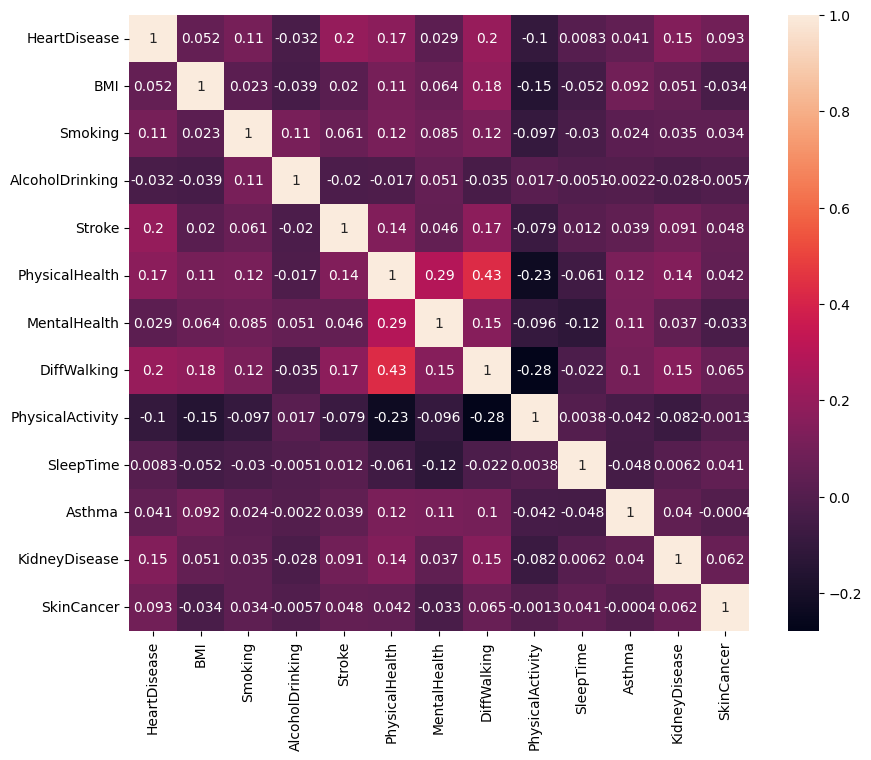

In [13]:
# Correlation Visualization
plt.figure(figsize=(10,8))
correlation = df.corr()
sb.heatmap(correlation, annot=True)

**Highest possitive Correlations:**
- 0.4 DiffWalking, PhysicalHealth

Statistical method for correlation analysis: **Pearson's Coefficient**.
By default Pandas corr() uses Pearson's Coeff. According to pearson,
positive correlation = if one variable increases, other increases. negative
correlation = if one variable increases, other decreases. 0 = no correlation

Resource: [Pearson's Coefficient](https://www.analyticsvidhya.com/blog/2021/01/beginners-guide-to-pearsons-correlation-coefficient/)

# Key Factors of Heart Disease according to medical science
- High Blood Pressure
- High Cholesterol
- Smoking
- Diabetes
- Obesity
- Inactive Lifestyle
- Alcohol Intake


### Source: [Link](http://https://www.cdc.gov/heartdisease/risk_factors.htm)

# After considering the heatmap and the medical factor itself, I will be using the following as our features to train the model.
- Smoking 
- AlcoholDrinking 
- Diabetes
- Stroke
- PhysicalHealth
- Sex
- Age
